## Problem Statement

This project aims to understand the prevalence of standardized test taking to California high school students. Some questions I'd like to consider are 
* Which schools have the highest testing rates?
* Do schools where more students take standardized tests also score better on those tests?
* Do different tests (ACT, SAT, potentially AP) have different patterns?
* How did testing prevalence / scores change in California during COVID?

### Contents

## Background

The ACT and SAT are two of the most widespread standardized college admission tests used in the United States. 
In 2019 more than 2.2 million students took the SAT ([Source](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf#page=3&zoom=100,-142,731)).
The ACT is ran by the nonprofit organization [ACT](https://www.act.org/content/act/en/about-act.html) of the same name while the SAT is ran by the [College Board](https://www.collegeboard.org/).

While many colleges and universities have previously required prospective applicants to take either the ACT or SAT this is rapidly changing during the era of COVID-19. 
Nevertheless, several top colleges still require or encourage these exams and they are recommended for many students ([Source 1](https://www.cbsnews.com/news/act-and-sat-no-longer-required-college-admissions/), [Source 2](https://supertutortv.com/college/where-sat-is-required-what-colleges-are-and-arent-test-optional-for-the-class-of-2022/)).
As a result the number of high school students taking the SAT dropped from 2.2 million in the class of 2019 to 1.5 million in the class of 2021 ([2019](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf#page=3&zoom=100,-142,731), [2021](https://reports.collegeboard.org/pdf/2021-total-group-sat-suite-assessments-annual-report.pdf)).

The SAT has 2 sections: Math, Evidence-Based Reading and Writing (ERW). 
The Math and ERW sections are graded on a scale of 200-800.
The total score is the sum of the scores on the Math and ERW sections ([Source](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting)). 
Additionally the college board sets benchmark scores designed to assess college readiness ([Source](https://collegereadiness.collegeboard.org/about/scores/benchmarks)).

The ACT has 4 sections: Math, English, Science, and Reading.
Each section is scored from 1-36 with a national average of about 21.
The composite score is the average of the four subject scores ([Source](https://www.princetonreview.com/college-advice/good-act-scores)).

Additionally both the SAT and ACT have a separate essay or writing test that is optional for a student to take with the rest of the exam.

### Datasets Used

For this project we use data on California high schools published by the California Department of Education. 
On their [website](https://www.cde.ca.gov/ds/sp/ai/) they provide information on all highschools in California who participated in the ACT, SAT, and AP (Advanced Placement) exams from the 2016-17 school year through the 2019-20 school year.

For the SAT, the data includes the number of students at the school, the number of students who took the SAT and the percentage of students meeting college readiness benchmarks.
For the ACT, the data includes similar information about the school, the number of students who took the ACT, the average on each section, and the percentage of students scoring at or above 21. 
Full data dictionaries are available on the CDE website at https://www.cde.ca.gov/ds/sp/ai/.

### Outside Research

**To-Do:** 

### Cali - ACTs

In [42]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### View Dataset

In [43]:
act_raw = pd.read_csv('data/act_2019_ca.csv')

In [44]:
act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [45]:
act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


### Data Cleaning

In [63]:
act_ca = act_raw.drop(columns='Unnamed: 17') # This column is all NA

In [64]:
# Last row is empty
print(act_ca.iloc[2309])
act_ca.drop(index = 2309, inplace = True)

CDS           NaN
CCode         NaN
CDCode        NaN
SCode         NaN
RType         NaN
SName         NaN
DName         NaN
CName         NaN
Enroll12      NaN
NumTstTakr    NaN
AvgScrRead    NaN
AvgScrEng     NaN
AvgScrMath    NaN
AvgScrSci     NaN
NumGE21       NaN
PctGE21       NaN
Year          NaN
Name: 2309, dtype: object


The data is rolled up on the levels of school (S), school district (D), county (C), and statewide (X).

In [65]:
act_ca['RType'].value_counts()

S    1728
D     522
C      58
X       1
Name: RType, dtype: int64

#### Drop unused columns
For our analysis we won't use the codes (except CDS for identification), school/district/county names, or any of the 4 subject scores

In [66]:
act_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21', 'Year'],
      dtype='object')

In [67]:
code_cols = ['CCode', 'CDCode', 'SCode']
name_cols = ['SName', 'DName', 'CName']
subject_cols = ['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci']
dropped_cols = code_cols + name_cols + subject_cols
act_ca.drop(columns=dropped_cols, inplace = True)

#### State aggregate
Statewide about 1 out of 6 students take the ACT. Of test takers, 55% score at least 21 (the national median).

In [68]:
act_ca.query("RType == 'X'")

,CDS,RType,Enroll12,NumTstTakr,NumGE21,PctGE21,Year
2070,0.0,X,489650.0,82668.0,45466,55.00,2018-19


#### School Size

If a school has fewer than 15 test takers their average scores aren't included in the data to protect annonymity. We'll drop these schools. 

??
Additionally we'll split the remaining schools off with fewer than 100 students so that the small schools in our sample are not biased towards those that take a lot of tests. There are 1306 entities remaining.

In [86]:
# act_small = act_ca.query('NumTstTakr < 15 | Enroll12 < 100')
act_small = act_ca.query('NumTstTakr < 15')
act_big = act_ca.drop(act_small.index)

In [87]:
act_big

,CDS,RType,Enroll12,NumTstTakr,NumGE21,PctGE21,Year
3,4.369666e+13,S,463,53,34,64.15,2018-19
4,1.964733e+13,S,226,19,11,57.89,2018-19
5,1.976968e+13,S,65,33,3,9.09,2018-19
6,1.964733e+13,S,126,16,5,31.25,2018-19
13,1.965136e+13,S,104,36,34,94.44,2018-19
...,...,...,...,...,...,...,...
2298,3.066647e+13,S,448,104,83,79.81,2018-19
2299,2.076414e+13,S,135,33,19,57.58,2018-19
2302,4.770516e+13,S,138,38,20,52.63,2018-19
2303,5.171465e+13,S,394,56,35,62.50,2018-19


#### School, District, County counts

In [88]:
act_big['RType'].value_counts()

S    1016
D     350
C      54
X       1
Name: RType, dtype: int64

#### Fix data types

In [89]:
act_big.dtypes

CDS           float64
RType          object
Enroll12        int32
NumTstTakr      int32
NumGE21        object
PctGE21        object
Year           object
dtype: object

* Make Enroll12 and NumTstTakr ints
* Make NumGE21 int
* Make PctGE21 a float

In [90]:
act_big['Enroll12'] = act_big['Enroll12'].astype(int)
act_big['NumTstTakr'] = act_big['NumTstTakr'].astype(int)

In [91]:
act_big['NumGE21'] = act_big['NumGE21'].astype(int)
act_big['PctGE21'] = act_big['PctGE21'].astype(float)

### Features to measure test performance and participation
Since our goal is to track test performance and particpation we need a metric for each of these.
For our purposes, we can measure the as follows: 
* perfomance by the percentage of test takers with a composite score above 21
* participation by the percentage of enrollees who take the test

In [92]:
act_big['ACT_taken_pct'] = 100*act_big['NumTstTakr']/act_big['Enroll12']
# act_ca['ACT_high_score_%'] = 100*act_ca['NumGE21']/act_ca['NumTstTakr'] # <-- This is redundant with PctGE21

Some schools have more test takers than students.
* 12 are alliance charter schools in LA. https://www.laalliance.org/
* 9 Aspire charter schools https://aspirepublicschools.org/discover_aspire/
* Most schools are in cities / urban areas - exception Los Molinos High

This could be due to homeschooling or students attending other schools that don't proctor the exam taking the exam at a larger schools.
For my purposes to capture the significance of testing to a school I will allow the percent to go above 100 but to handle outliers I limit it at 125%

In [84]:
act_raw.query('Enroll12 < NumTstTakr').drop(columns = code_cols + subject_cols + ['Unnamed: 17', 'Year'])

,CDS,RType,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21
34,1.964733e+13,S,Alliance Alice M. Baxter College-Ready High,Los Angeles Unified,Los Angeles,61.0,77.0,12,15.58
35,1.964733e+13,S,Alliance Cindy and Bill Simon Technology Acade...,Los Angeles Unified,Los Angeles,123.0,155.0,13,8.39
39,1.964733e+13,S,Alliance Judy Ivie Burton Technology Academy High,Los Angeles Unified,Los Angeles,138.0,162.0,24,14.81
40,1.964733e+13,S,Alliance Leichtman-Levine Family Foundation En...,Los Angeles Unified,Los Angeles,128.0,155.0,40,25.81
41,1.964733e+13,S,Alliance Marc & Eva Stern Math and Science,Los Angeles Unified,Los Angeles,141.0,157.0,48,30.57
42,1.964733e+13,S,Alliance Margaret M. Bloomfield Technology Aca...,Los Angeles Unified,Los Angeles,114.0,139.0,19,13.67
43,1.964733e+13,S,Alliance Morgan McKinzie High,Los Angeles Unified,Los Angeles,73.0,86.0,7,8.14
44,1.964733e+13,S,Alliance Ouchi-O'Donovan 6-12 Complex,Los Angeles Unified,Los Angeles,130.0,148.0,16,10.81
45,1.964733e+13,S,Alliance Patti And Peter Neuwirth Leadership A...,Los Angeles Unified,Los Angeles,131.0,164.0,18,10.98
46,1.964733e+13,S,Alliance Piera Barbaglia Shaheen Health Servic...,Los Angeles Unified,Los Angeles,105.0,143.0,4,2.80


In [101]:
act_big['ACT_taken_pct'].clip(upper = 125, inplace = True)

#### Select Data for Later Analysis

In [102]:
# act_ca.head()

In [130]:
act_df = act_big.drop(columns = ['NumGE21'])
act_df.head()

,CDS,RType,Enroll12,NumTstTakr,PctGE21,Year,ACT_taken_pct
3,4.369666e+13,S,463,53,64.15,2018-19,11.447084
4,1.964733e+13,S,226,19,57.89,2018-19,8.407080
5,1.976968e+13,S,65,33,9.09,2018-19,50.769231
6,1.964733e+13,S,126,16,31.25,2018-19,12.698413
13,1.965136e+13,S,104,36,94.44,2018-19,34.615385


In [131]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 3 to 2306
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CDS            1421 non-null   float64
 1   RType          1421 non-null   object 
 2   Enroll12       1421 non-null   int32  
 3   NumTstTakr     1421 non-null   int32  
 4   PctGE21        1421 non-null   float64
 5   Year           1421 non-null   object 
 6   ACT_taken_pct  1421 non-null   float64
dtypes: float64(3), int32(2), object(2)
memory usage: 77.7+ KB


In [132]:
act_df['RType'].value_counts()

S    1016
D     350
C      54
X       1
Name: RType, dtype: int64

#### Which schools / districts have the highest testing rates?

Charter schools take a lot of tests.

In [133]:
act_df.query('RType == "S"').merge(act_raw[['SName', 'CName', 'CDS']], how = 'left', on = 'CDS') \
    .sort_values('ACT_taken_pct', ascending = False).head(20)

,CDS,RType,Enroll12,NumTstTakr,PctGE21,Year,ACT_taken_pct,SName,CName
76,1.612590e+12,S,65,151,20.53,2018-19,125.000000,Aspire Golden State College Preparatory Academy,Alameda
82,5.071175e+13,S,18,23,34.78,2018-19,125.000000,Aspire Vanguard College Preparatory Academy,Stanislaus
32,1.964733e+13,S,59,110,21.82,2018-19,125.000000,Alliance Ted K. Tajima High,Los Angeles
30,1.964733e+13,S,105,143,2.80,2018-19,125.000000,Alliance Piera Barbaglia Shaheen Health Servic...,Los Angeles
29,1.964733e+13,S,131,164,10.98,2018-19,125.000000,Alliance Patti And Peter Neuwirth Leadership A...,Los Angeles
735,1.964733e+13,S,0,22,4.55,2018-19,125.000000,PUC Nueva Esperanza Charter Academy,Los Angeles
20,1.964733e+13,S,123,155,8.39,2018-19,125.000000,Alliance Cindy and Bill Simon Technology Acade...,Los Angeles
19,1.964733e+13,S,61,77,15.58,2018-19,125.000000,Alliance Alice M. Baxter College-Ready High,Los Angeles
75,4.168999e+13,S,20,31,9.68,2018-19,125.000000,Aspire East Palo Alto Charter,San Mateo
73,3.467447e+13,S,36,44,15.91,2018-19,122.222222,Aspire Alexander Twilight Secondary Academy,Sacramento


In [127]:
act_df.query('RType == "D"').merge(act_raw[['DName', 'CName', 'CDS']], how = 'left', on = 'CDS'). \
    sort_values('ACT_taken_pct', ascending = False).head(20)

,CDS,RType,Enroll12,PctGE21,Year,ACT_taken_pct,DName,CName
268,4.168999e+13,D,20,9.68,2018-19,125.000000,Ravenswood City Elementary,San Mateo
194,3.367157e+13,D,157,34.32,2018-19,107.643312,Nuview Union,Riverside
325,5.271571e+13,D,37,23.68,2018-19,102.702703,Los Molinos Unified,Tehama
97,1.964592e+13,D,112,43.75,2018-19,100.000000,Hawthorne,Los Angeles
217,3.667710e+13,D,2941,11.01,2018-19,87.113227,Fontana Unified,San Bernardino
102,1.964709e+13,D,296,17.24,2018-19,78.378378,Lennox,Los Angeles
101,1.964691e+13,D,126,19.79,2018-19,76.190476,Lawndale Elementary,Los Angeles
150,2.573585e+13,D,57,25.00,2018-19,70.175439,Modoc Joint Unified,Modoc
210,3.475283e+13,D,1130,20.98,2018-19,68.318584,Natomas Unified,Sacramento
69,1.673932e+13,D,165,3.57,2018-19,67.878788,Reef-Sunset Unified,Kings


#### Which schools / districts perform the best on the ACT?

In [134]:
act_df.query('RType == "S"').merge(act_raw[['SName', 'CName', 'CDS']], how = 'left', on = 'CDS') \
    .sort_values('PctGE21', ascending = False).head(20)

,CDS,RType,Enroll12,NumTstTakr,PctGE21,Year,ACT_taken_pct,SName,CName
830,5.672604e+13,S,252,26,100.00,2018-19,10.317460,Santa Susana High,Ventura
769,3.768189e+13,S,50,15,100.00,2018-19,30.000000,River Valley Charter,San Diego
679,3.066431e+13,S,200,56,100.00,2018-19,28.000000,Oxford Academy,Orange
992,1.964212e+13,S,165,55,98.18,2018-19,33.333333,Whitney (Gretchen) High,Los Angeles
708,1.612750e+12,S,205,111,97.30,2018-19,54.146341,Piedmont High,Alameda
598,4.369468e+13,S,584,212,97.17,2018-19,36.301370,Monta Vista High,Santa Clara
837,4.369534e+13,S,321,121,96.69,2018-19,37.694704,Saratoga High,Santa Clara
589,1.611760e+12,S,490,157,96.18,2018-19,32.040816,Mission San Jose High,Alameda
540,4.369468e+13,S,415,172,95.93,2018-19,41.445783,Lynbrook High,Santa Clara
146,3.768346e+13,S,635,409,95.84,2018-19,64.409449,Canyon Crest Academy,San Diego


In [135]:
act_df.query('RType == "D"').merge(act_raw[['DName', 'CName', 'CDS']], how = 'left', on = 'CDS'). \
    sort_values('PctGE21', ascending = False).head(20)

,CDS,RType,Enroll12,NumTstTakr,PctGE21,Year,ACT_taken_pct,DName,CName
237,3.768189e+13,D,71,16,100.00,2018-19,22.535211,Lakeside Union Elementary,San Diego
283,4.369534e+13,D,870,308,96.10,2018-19,35.402299,Los Gatos-Saratoga Joint Union High,Santa Clara
290,4.410447e+13,D,594,48,95.83,2018-19,8.080808,Santa Cruz County Office of Education,Santa Cruz
10,1.612750e+12,D,231,116,94.83,2018-19,50.216450,Piedmont City Unified,Alameda
281,4.369468e+13,D,2761,872,94.27,2018-19,31.582760,Fremont Union High,Santa Clara
99,1.964659e+13,D,347,138,94.20,2018-19,39.769452,La Canada Unified,Los Angeles
342,5.673874e+13,D,438,157,93.63,2018-19,35.844749,Oak Park Unified,Ventura
64,1.573742e+13,D,353,15,93.33,2018-19,4.249292,Sierra Sands Unified,Kern
345,5.772678e+13,D,717,156,92.95,2018-19,21.757322,Davis Joint Unified,Yolo
4,1.611760e+12,D,2537,511,92.56,2018-19,20.141900,Fremont Unified,Alameda


#### Do schools where more students take standardized tests also score better on those tests?

No.

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

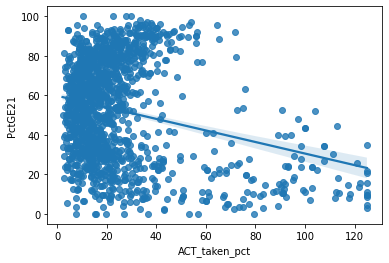

In [140]:
sns.regplot(data = act_df, x = 'ACT_taken_pct', y = 'PctGE21')

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

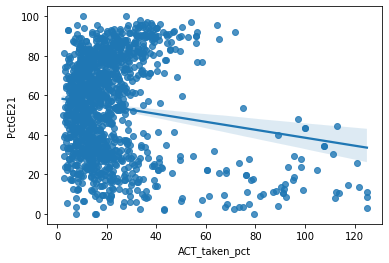

In [139]:
sns.regplot(data = act_df.query('Enroll12 >= 100'), x = 'ACT_taken_pct', y = 'PctGE21')

### Cali SATs

#### View Dataset

In [37]:
sat_raw = pd.read_csv('data/sat_2019_ca.csv')

In [38]:
sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [39]:
sat_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


### Data Cleaning

#### Drop Unused Columns

In [84]:
sat_ca = sat_raw.drop(columns='Unnamed: 25')

In [85]:
sat_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTSTTakr12', 'NumERWBenchmark12', 'PctERWBenchmark12',
       'NumMathBenchmark12', 'PctMathBenchmark12', 'Enroll11', 'NumTSTTakr11',
       'NumERWBenchmark11', 'PctERWBenchmark11', 'NumMathBenchmark11',
       'PctMathBenchmark11', 'TotNumBothBenchmark12', 'PctBothBenchmark12',
       'TotNumBothBenchmark11', 'PctBothBenchmark11', 'Year'],
      dtype='object')

In [86]:
code_cols = ['CCode', 'CDCode', 'SCode']
name_cols = ['SName', 'DName', 'CName']
subject_cols = ["NumERWBenchmark12", "PctERWBenchmark12", 
                "NumMathBenchmark12", "PctMathBenchmark12",
                "NumERWBenchmark11", "PctERWBenchmark11", 
                "NumMathBenchmark11", "PctMathBenchmark11"]
pct_cols = ["PctBothBenchmark12", "PctBothBenchmark11"]
dropped_cols = code_cols + name_cols + subject_cols #+ pct_cols
sat_ca.drop(columns = dropped_cols, inplace=True)

#### Check data types

In [73]:
sat_ca.dtypes

CDS                      float64
RType                     object
Enroll12                 float64
NumTSTTakr12             float64
Enroll11                 float64
NumTSTTakr11             float64
TotNumBothBenchmark12     object
TotNumBothBenchmark11     object
Year                      object
dtype: object

In [95]:
sat_ca['is_small_sample'] = (sat_ca["NumTSTTakr12"] < 15) | (sat_ca["NumTSTTakr11"] < 15)
sat_ca.head()
sat_ca.groupby('is_small_sample').mean()

,CDS,Enroll12,NumTSTTakr12,Enroll11,NumTSTTakr11
is_small_sample,,,,,
False,2.876979e+13,1136.413667,412.577791,1116.955461,500.422209
True,2.981675e+13,71.181915,5.689362,57.672340,6.710638


In [75]:
sat_ca['TotNumBothBenchmark12'].value_counts(dropna = False)

*       582
NaN     276
10       35
15       33
18       31
       ... 
7146      1
297       1
270       1
111       1
2721      1
Name: TotNumBothBenchmark12, Length: 354, dtype: int64

#### Combine 11 and 12th grade numbers
This will smooth out the data somewhat and the differences between 11th and 12th grade students probably don't vary much by school.

In [50]:
sat_ca['Enroll_all'] = sat_ca['Enroll11'] + sat_ca['Enroll12'] 
sat_ca['NumTSTTakr_all'] = sat_ca['NumTSTTakr11'] + sat_ca['NumTSTTakr12'] 
sat_ca['TotNumBothBenchmark_all'] = sat_ca['TotNumBothBenchmark11'] + sat_ca['TotNumBothBenchmark12'] 

In [67]:
sat_ca.drop(columns = sat_ca.loc[:, 'Enroll12':'TotNumBothBenchmark11'].columns, inplace = True)

In [68]:
sat_ca.head()

,CDS,RType,Year,Enroll_all,NumTSTTakr_all,TotNumBothBenchmark_all
0,6.615981e+12,S,2018-19,36.0,0.0,NaN
1,6.616061e+12,S,2018-19,55.0,16.0,**
2,1.964733e+13,S,2018-19,425.0,276.0,1114
3,1.964733e+13,S,2018-19,560.0,388.0,3518
4,1.964733e+13,S,2018-19,35.0,19.0,**


In [ ]:
sat_ca

In [ ]:
sat_ca[sat_ca['TotNumBothBenchmark12'].isna()]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
12,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
19,1.062117e+13,10.0,1062117.0,1030469.0,S,Enterprise Alternative,Clovis Unified,Fresno,18.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
36,3.768163e+13,37.0,3768163.0,137109.0,S,Diego Valley East Public Charter,Julian Union Elementary,San Diego,78.0,0.0,...,1.0,*,*,*,*,NaN,NaN,*,*,2018-19
43,3.467314e+13,34.0,3467314.0,3430352.0,S,Las Flores High (Alternative),Elk Grove Unified,Sacramento,64.0,0.0,...,1.0,*,*,*,*,NaN,NaN,*,*,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,4.110413e+13,41.0,4110413.0,0.0,D,NaN,San Mateo County Office of Education,San Mateo,97.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2561,1.976992e+13,19.0,1976992.0,0.0,D,NaN,SBE - Prepa Tec Los Angeles High,Los Angeles,0.0,0.0,...,47.0,17,36.17,4,8.51,NaN,NaN,4,8.51,2018-19
2572,5.071092e+13,50.0,5071092.0,0.0,D,NaN,Hart-Ransom Union Elementary,Stanislaus,18.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2573,5.071134e+13,50.0,5071134.0,0.0,D,NaN,Keyes Union,Stanislaus,25.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [ ]:
sat_ca.loc[:,['NumERWBenchmark12', 'NumERWBenchmark11', 
            'NumMathBenchmark12', 'NumMathBenchmark11', 
            'TotNumBothBenchmark12', 'TotNumBothBenchmark11']].fillna(0, inplace = True)

In [ ]:
sat_schools = set(sat_ca['SCode'].dropna())
# sat_schools

NameError: name 'sat_ca' is not defined

In [ ]:
sat_ca.loc[sat_ca['RType'] == 'S', ['Enroll12', 'TotNumBothBenchmark12']]

,Enroll12,TotNumBothBenchmark12
0,18.0,NaN
1,29.0,*
2,206.0,14
3,227.0,18
4,18.0,*
...,...,...
1976,76.0,6
1977,15.0,*
1978,27.0,*
1979,1083.0,293


### Compare schools

In [ ]:
schools = act_schools & sat_schools
act_only_schools = act_schools - sat_schools
sat_only_schools = sat_schools - act_schools
print(len(schools))
print(len(act_only_schools))
print(len(sat_only_schools))

1306
3
676
